# Wine Quality Prediction: Exploratory Data Analysis

## 1. Introduction

This notebook explores the Wine Quality datase from the UCI Machine Learning Repository. The data consists of physicochemicals properties of wines with their quality ratings. THe objective is to predict wine quality based of this properties.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

## 2. Data Loading and Initial Inspection
Let's load the dataset and examine its basic structure.

In [40]:
# Load the wine quality dataset
wine_path = '../data/raw/winequality-red.csv'
wine_df = pd.read_csv(wine_path, sep=';')

# Display basic information
print(f"Dataset shape: {wine_df.shape}")
print(f"The dataset contains {wine_df.shape[0]} samples with {wine_df.shape[1]} features.")

Dataset shape: (1599, 12)
The dataset contains 1599 samples with 12 features.


Let's look at the first few rows to understand the data structure:

In [41]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Let's examine the data types and check for missing values:

In [42]:
# Display data information
print("\nDataset info")
wine_df.info()

# Check for missing values 
print("\nMissing values in each colum:")
print(wine_df.isnull().sum())


Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

Missing values in each colum:
fixed acidity           0
volatile acidity        0
citric acid             0
res

Getting summary statistics to understand the range and distribution of each feature:

In [43]:
# Display descriptive statitics
print("\nDescriptive statitics:")
wine_df.describe()


Descriptive statitics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 3. Exploratory Data Analysis

### 3.1 Target Variable Distribution

Let's start by examining the distribution of our target variable: wine quality.

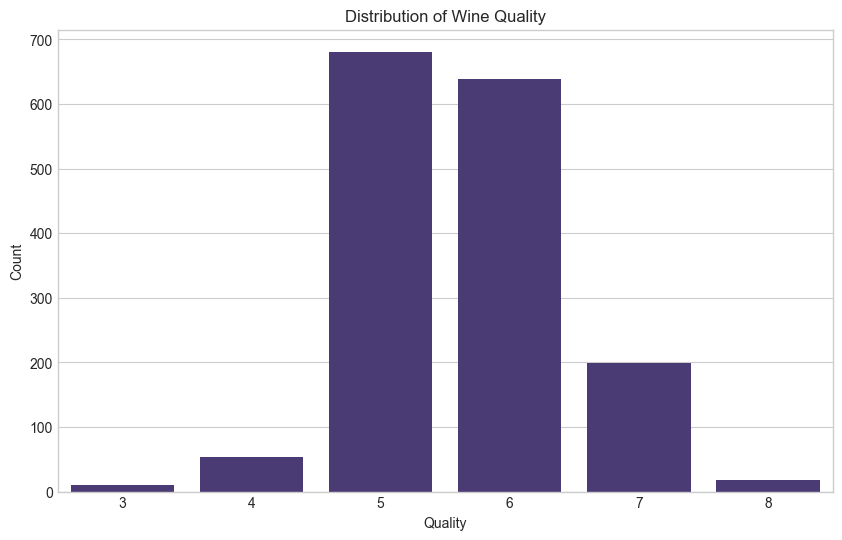

In [44]:
# Distribution of wine quality
plt.figure(figsize=(10,6))
sns.countplot(x='quality', data=wine_df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.savefig('../reports/figures/quality_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [45]:
# Print some statitics about quality
print(f"Minimum quality: {wine_df['quality'].min()}")
print(f"Maximum quality: {wine_df['quality'].max()}")
print(f"Mean quality: {wine_df['quality'].mean():.2f}")
print(f"Most common quality rating: {wine_df['quality'].mode()[0]}")

Minimum quality: 3
Maximum quality: 8
Mean quality: 5.64
Most common quality rating: 5


### 3.2 Feature Distributions
Let's examine the distribution of each feature to understand their characteristics.

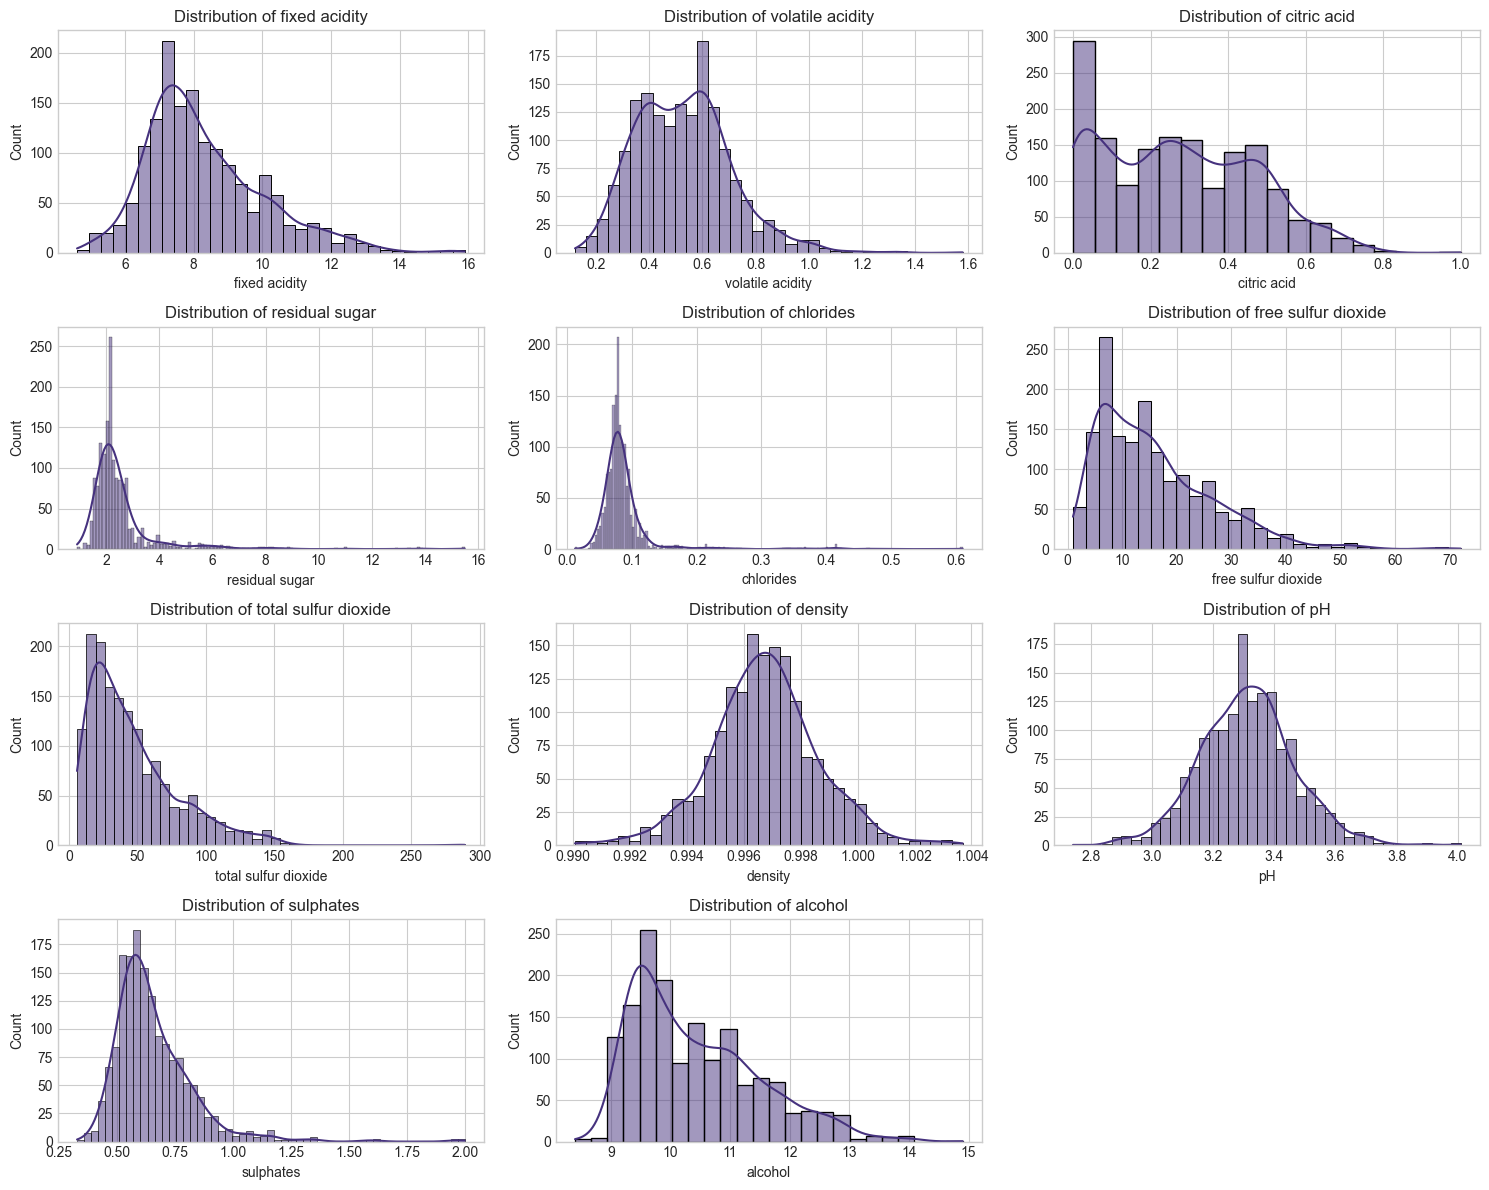

In [46]:
# Exploring feature distributions
plt.figure(figsize=(15, 12))
for i, column in enumerate(wine_df.columns[:-1], 1):
    plt.subplot(4, 3, i)
    sns.histplot(wine_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.savefig('../reports/figures/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

### 3.3 Correlation Analysis

Let's look at how the features correlate with each other and with the target variables.

In [47]:
# Calculate correlation matrix
correlation_matrix = wine_df.corr()

# Display correlation with quality
print("Correlation with quality (target variable):")
print(correlation_matrix['quality'].sort_values(ascending=False))

Correlation with quality (target variable):
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


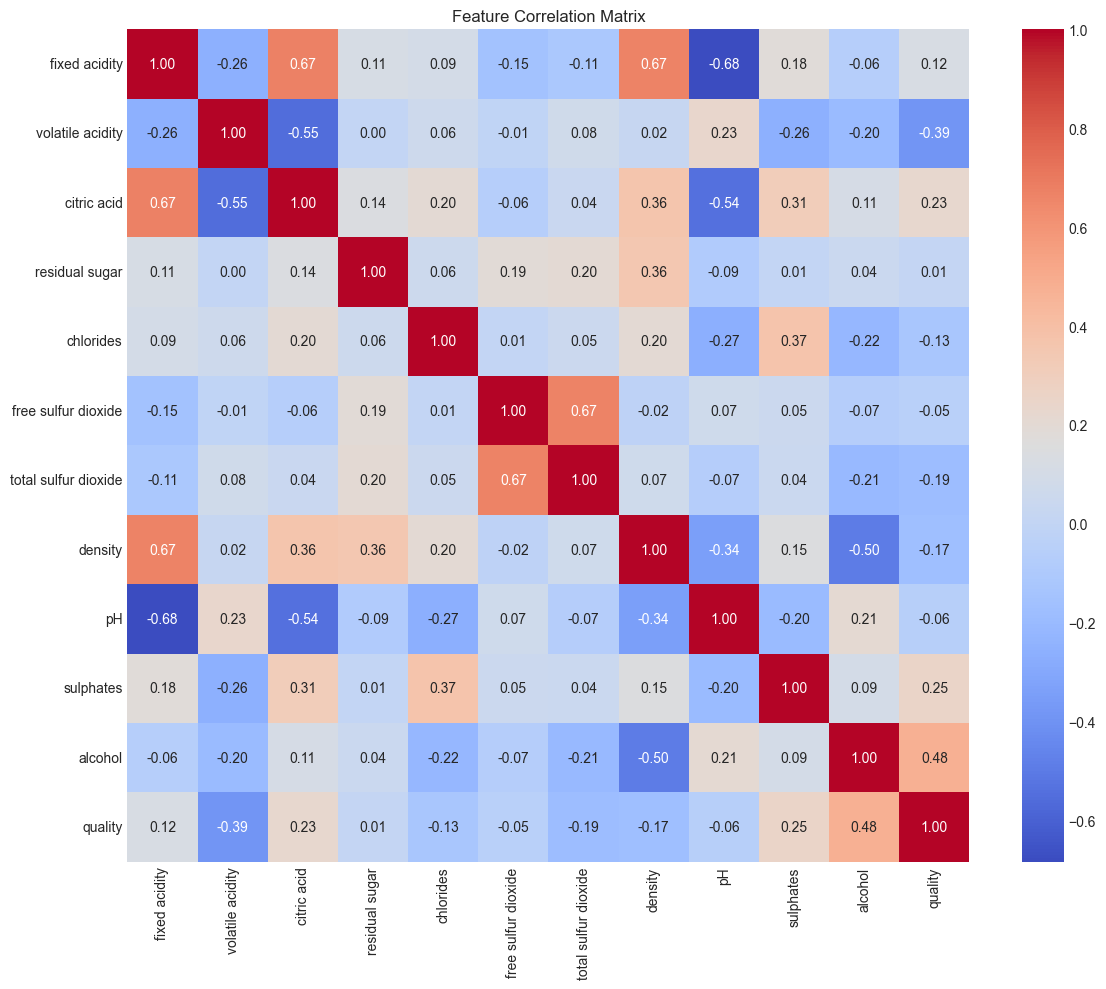

In [48]:
# Visualize correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('../reports/figures/correlation_matric.png', dpi=300, bbox_inches='tight')
plt.show()

Based on the correlation matrix, let's explore the relationship between key features and quality.

In [49]:
key_features = ['alcohol', 'volatile acidity', 'sulphates', 'quality']

<Figure size 1200x1000 with 0 Axes>

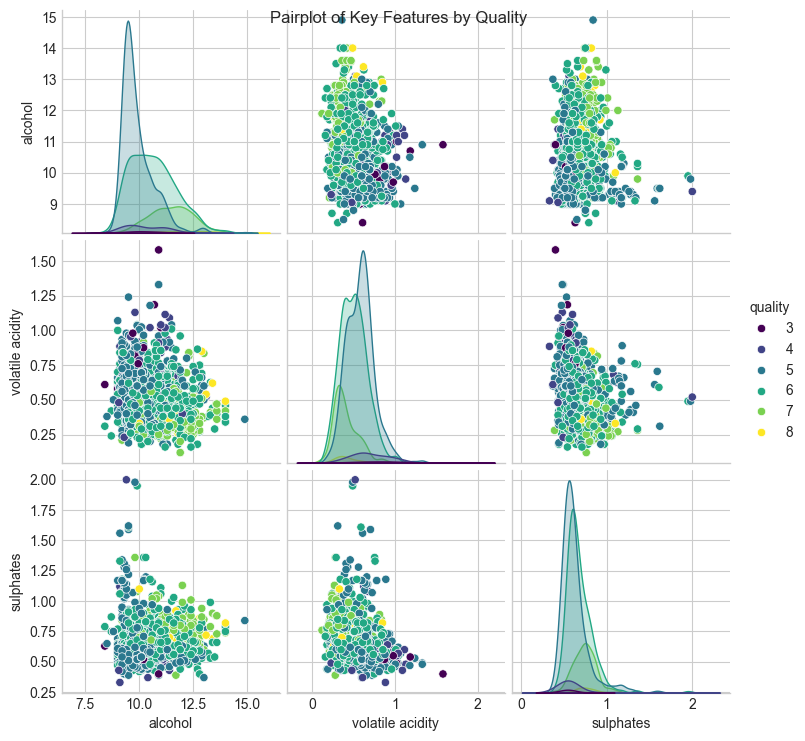

In [50]:
plt.figure(figsize=(12,10))
sns.pairplot(wine_df[key_features], hue='quality', palette='viridis')
plt.suptitle('Pairplot of Key Features by Quality')
plt.savefig('../reports/figures/pairplot_key_features.png', dpi=300, bbox_inches='tight')
plt.show()

## 3.4 Relationship Between Features and Quality

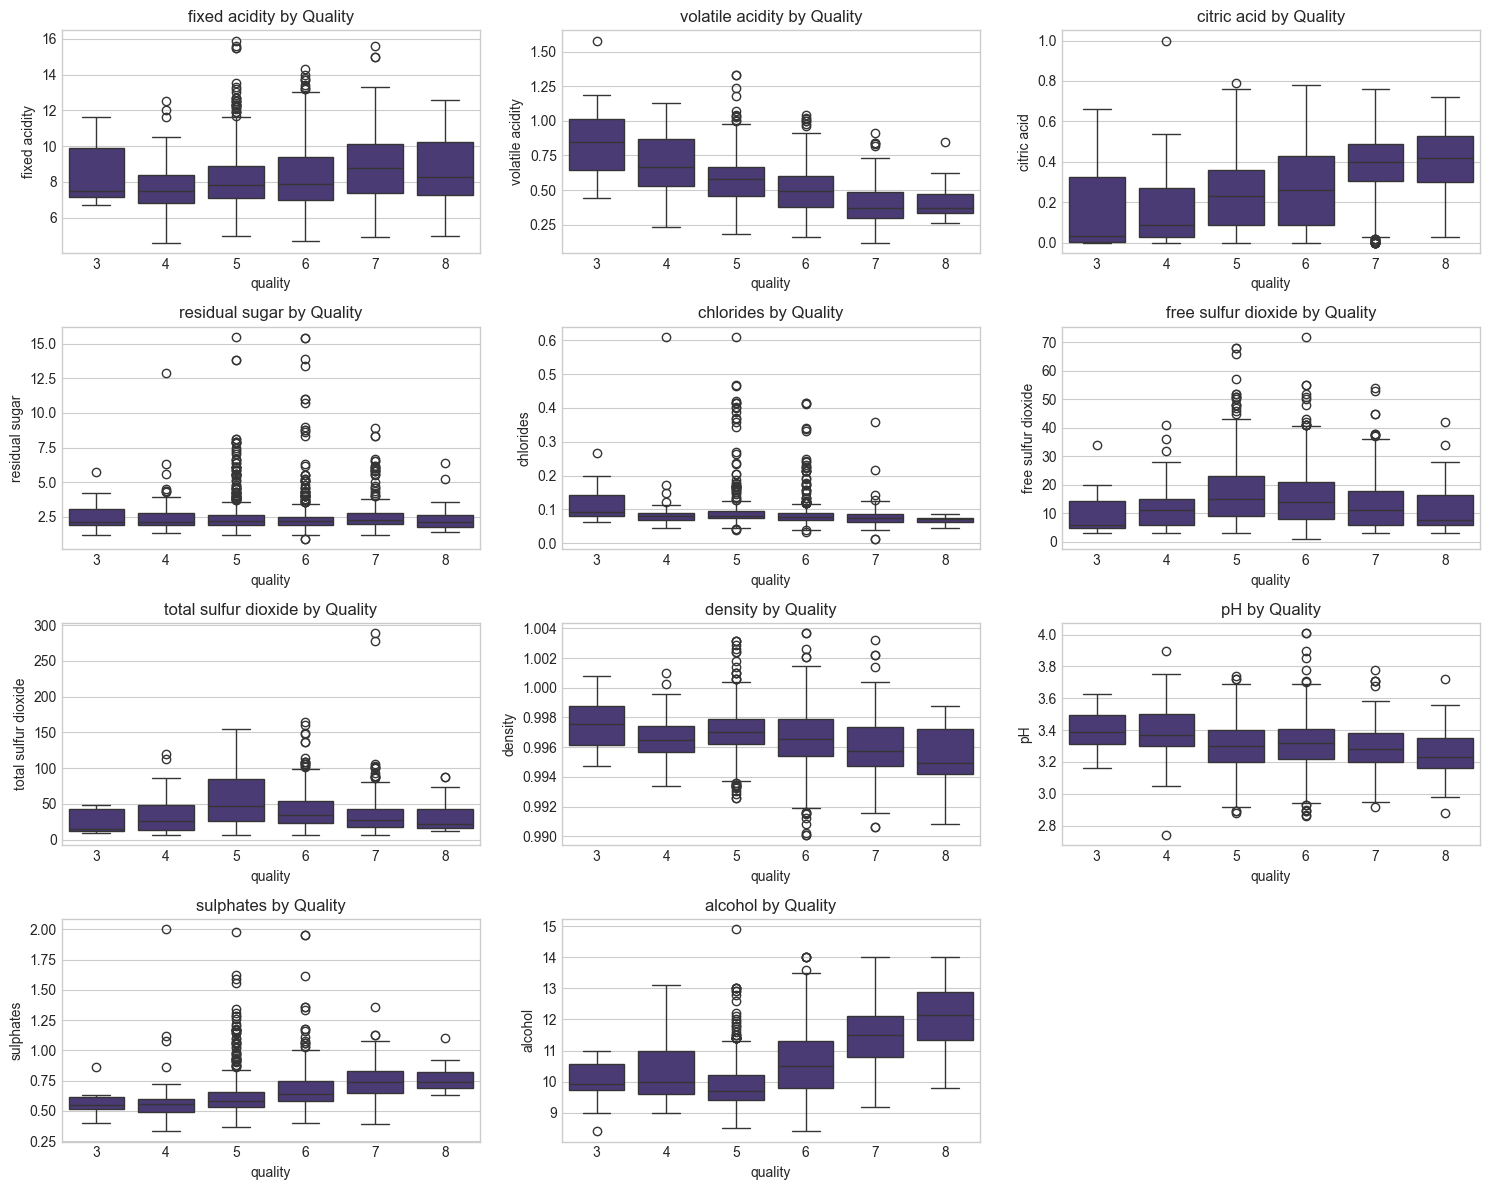

In [51]:
plt.figure(figsize=(15,12))
for i, column in enumerate(wine_df.columns[:-1], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='quality', y=column, data=wine_df)
    plt.title(f'{column} by Quality')
plt.tight_layout()
plt.savefig('../reports/figures/boxplots_by_quality.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Data Cleaning and Preparation

### 4.1 Outlier Detection and Analysis

In [52]:
# Function to identify outliers using IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in each feature
for column in wine_df.columns[:-1]:
    outliers, lower, upper = identify_outliers(wine_df, column)
    print(f"\nFeature: {column}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers) / len(wine_df)) * 100:.2f}%")
    print(f"Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
    
    # If there are too many outliers, print a sample
    if len(outliers) > 0 and len(outliers) <= 5:
        print("Sample outliers:")
        print(outliers[[column, 'quality']].head())


Feature: fixed acidity
Number of outliers: 49
Percentage of outliers: 3.06%
Lower bound: 3.95, Upper bound: 12.35

Feature: volatile acidity
Number of outliers: 19
Percentage of outliers: 1.19%
Lower bound: 0.02, Upper bound: 1.02

Feature: citric acid
Number of outliers: 1
Percentage of outliers: 0.06%
Lower bound: -0.40, Upper bound: 0.91
Sample outliers:
     citric acid  quality
151          1.0        4

Feature: residual sugar
Number of outliers: 155
Percentage of outliers: 9.69%
Lower bound: 0.85, Upper bound: 3.65

Feature: chlorides
Number of outliers: 112
Percentage of outliers: 7.00%
Lower bound: 0.04, Upper bound: 0.12

Feature: free sulfur dioxide
Number of outliers: 30
Percentage of outliers: 1.88%
Lower bound: -14.00, Upper bound: 42.00

Feature: total sulfur dioxide
Number of outliers: 55
Percentage of outliers: 3.44%
Lower bound: -38.00, Upper bound: 122.00

Feature: density
Number of outliers: 45
Percentage of outliers: 2.81%
Lower bound: 0.99, Upper bound: 1.00

Fea

Let's transform our target variable from a multi-class problem to a binary classification problem, which will simplify our analysis.

In [53]:
# Transform the quality variable into binary (good/bad wine)
# Define good wine as having quality >= 7
wine_df['good_quality'] = (wine_df['quality'] >= 7).astype(int)
print("\nClass distribution for binary quality:")
print(wine_df['good_quality'].value_counts())
print(f"Percentage of good quality wines: {wine_df['good_quality'].mean() * 100:.2f}%")


Class distribution for binary quality:
good_quality
0    1382
1     217
Name: count, dtype: int64
Percentage of good quality wines: 13.57%


Let's visualize the distribution of features by our binary target:

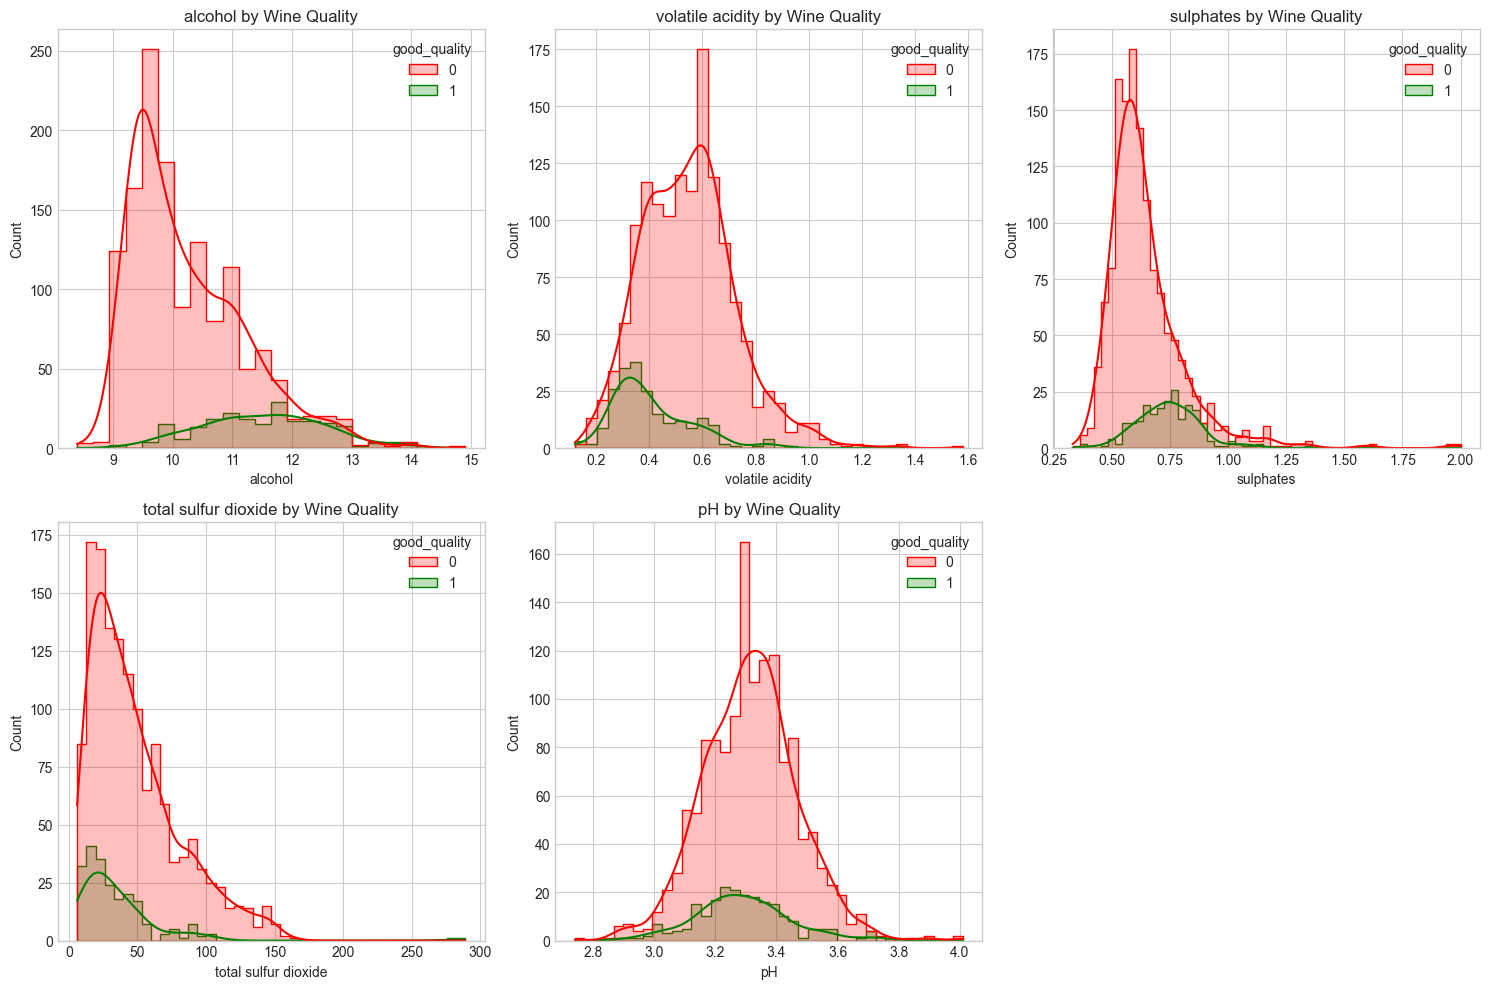

In [54]:
# Compare distributions of key features between good and bad quality wines
plt.figure(figsize=(15, 10))
key_features_to_plot = ['alcohol', 'volatile acidity', 'sulphates', 'total sulfur dioxide', 'pH']

for i, feature in enumerate(key_features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(
        data=wine_df, 
        x=feature, 
        hue='good_quality', 
        kde=True, 
        element="step",
        palette=['red', 'green']
    )
    plt.title(f'{feature} by Wine Quality')
    
plt.tight_layout()
plt.savefig('../reports/figures/feature_dist_by_quality.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.3 Data preparation for Modeling

In [55]:
# Split the data into features and target
X = wine_df.drop(['quality', 'good_quality'], axis=1)
y = wine_df['good_quality']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")



Training set shape: (1279, 11)
Testing set shape: (320, 11)


In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nScaled Training Data Preview:")
X_train_scaled_df.head()


Scaled Training Data Preview:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.071001,-0.599495,1.531308,0.630321,-0.375000,-1.124483,-1.135859,0.176504,-1.770134,-0.179773,-0.781948
1,-0.197022,-1.949661,0.497449,-1.188678,-0.817536,1.916741,1.980242,-3.533978,-2.748781,-1.311551,2.095269
2,-0.658121,0.441258,-1.311805,-0.461079,0.172902,-0.554254,-0.474868,-0.931890,0.970077,-0.775445,1.259948
3,0.033528,-0.880779,0.807607,-0.170039,-0.522512,-0.364177,-0.852577,-0.667987,-0.921974,0.892438,0.703067
4,-0.369934,0.638158,-0.329639,-0.242799,-0.227488,1.536588,2.735660,-0.615206,-0.269542,-1.251984,-0.503507


In [61]:
# Save the processed data
processed_data = {
    'X_train': X_train_scaled_df,
    'X_test': X_test_scaled_df,
    'y_train': y_train,
    'y_test': y_test,
    'scaler': scaler
}

In [62]:
import pickle
with open('../data/processed/processed_data.pickle', 'wb') as f:
    pickle.dump(processed_data, f)
    
print("\nProcessed data saved successfully!")



Processed data saved successfully!


In [64]:
print("EDA Summary:")
print("1. Dataset contains {} samples with {} features.".format(wine_df.shape[0], wine_df.shape[1]-2))
print("2. No missing values were found in the dataset.")
print("3. The target variable has been transformed into a binary classification task.")
print("4. Key features correlated with wine quality include:")
abs_corr = correlation_matrix['quality'].abs().sort_values(ascending=False)
for feature, corr in [(feat, correlation_matrix['quality'][feat]) for feat in abs_corr.index[1:6]]:
    print(f"   - {feature}: {corr:.3f}")
print("5. Data has been scaled and split into training and testing sets.")
print("6. Outliers have been identified but not removed - we'll handle them in the modeling stage.")

EDA Summary:
1. Dataset contains 1599 samples with 11 features.
2. No missing values were found in the dataset.
3. The target variable has been transformed into a binary classification task.
4. Key features correlated with wine quality include:
   - alcohol: 0.476
   - volatile acidity: -0.391
   - sulphates: 0.251
   - citric acid: 0.226
   - total sulfur dioxide: -0.185
5. Data has been scaled and split into training and testing sets.
6. Outliers have been identified but not removed - we'll handle them in the modeling stage.
